In [ ]:
6

In [208]:
import numpy as np
print(np.random.randint(4,11))

7


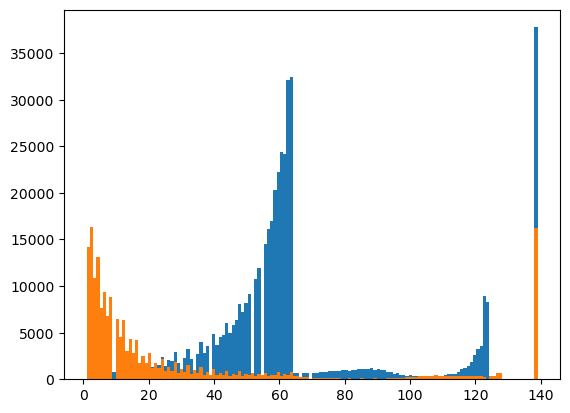

TDC_CHANNEL
139    54048
64     33153
63     32543
dtype: int64
10999 10849


In [14]:
import pandas as pd

N=50000
df=pd.read_csv("data/data_000637.txt")#,nrows=N)
x=df["BX_COUNTER"].max()+1
tot_time=(df["ORBIT_CNT"].max()-df["ORBIT_CNT"].min())*x*25/10**9
df["time (s)"]=(df["ORBIT_CNT"]*x*25+df["BX_COUNTER"]*25+df["TDC_MEAS"]*25/30)/10**9
mask=np.random.randint(0,2,df.shape[0])
df["HEAD"]=mask
df2=df.loc[df["HEAD"]==1]

dfFPGA0=df2.loc[df["FPGA"]==0].TDC_CHANNEL
dfFPGA1=df2.loc[df["FPGA"]==1].TDC_CHANNEL

plt.hist(dfFPGA0[:],bins=140)
plt.hist(dfFPGA1[:],bins=140)
plt.show()

noisy=df2.groupby("TDC_CHANNEL").size().sort_values(ascending=False).head(3)
print(noisy)

print(df2.ORBIT_CNT.nunique(),df2.ORBIT_CNT.loc[df2["TDC_CHANNEL"]==139].nunique())

# Numpy

In [1]:
#primo esercizio
import numpy as np

# find the outer product in 3 different ways
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#with np.outer
out_1=np.outer(u,v)

#with nested for loop
out_2=np.array([i*j for i in u for j in v]).reshape(4,4)

#with broadcasting operations
out_3=u.reshape(-1,1)*v

print(out_1,"\n\n",out_2,"\n\n",out_3)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


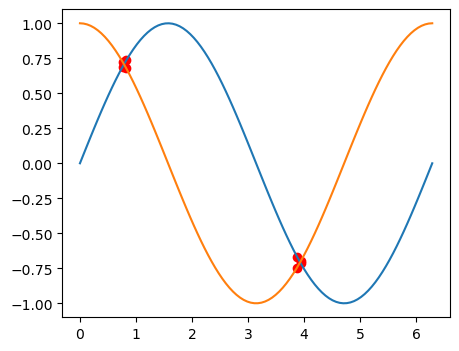

In [71]:
#secondo esercizio numpy
import matplotlib.pyplot as plt
pi=np.pi

num=np.linspace(0,2*pi,100)
num_sliced=num[::10]
num_inverted=num[::-1]

num_extracted=num[abs(np.sin(num)-np.cos(num))<0.1]

fig,ax=plt.subplots(1,1,figsize=(5,4))
ax.plot(num,np.sin(num))
ax.plot(num,np.cos(num))
ax.scatter(num_extracted,np.cos(num_extracted),c="red")
ax.scatter(num_extracted,np.sin(num_extracted),c="red")

plt.show()

In [2]:
#terzo esercizio
pos=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
k=1.60934
dist=abs(pos.reshape(-1,1)-pos)
dist_km=k*dist
print(dist)

import pandas as pd
city = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", 
          "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]

df=pd.DataFrame(dist,columns=city,index=city)
df

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


Chicago  Springfield  Saint-Louis  Tulsa  Oklahoma City  \
Chicago              0          198          303    736            871   
Springfield        198            0          105    538            673   
Saint-Louis        303          105            0    433            568   
Tulsa              736          538          433      0            135   
Oklahoma City      871          673          568    135              0   
Amarillo          1175          977          872    439            304   
Santa Fe          1475         1277         1172    739            604   
Albuquerque       1544         1346         1241    808            673   
Flagstaff         1913         1715         1610   1177           1042   
Los Angeles       2448         2250         2145   1712           1577   

               Amarillo  Santa Fe  Albuquerque  Flagstaff  Los Angeles  
Chicago            1175      1475         1544       1913         2448  
Springfield         977      1277         1346       1715         2250  
Saint-Louis         872      1172         1241       1610         2145  
Tulsa               439       739          808       1177         1712  
Oklahoma City       304       604          673       1042         1577  
Amarillo              0       300          369        738         1273  
Santa Fe            300         0           69        438          973  
Albuquerque         369        69            0        369          904  
Flagstaff           738       438          369          0          535  
Los Angeles        1273       973          904        535            0

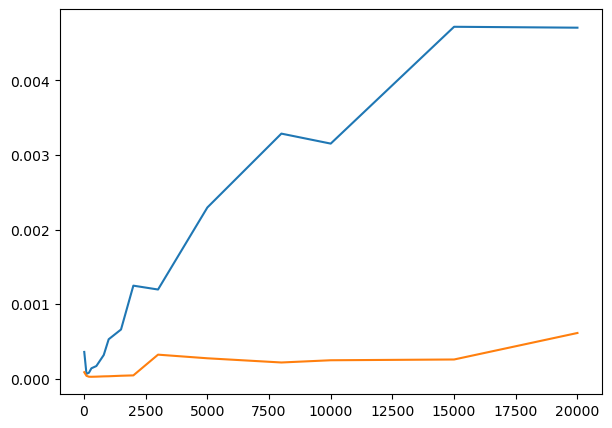

In [27]:
#quarto esercizio
import timeit

def Erathostenes_primes(N):
    num=np.arange(N+1)
    mask=np.ones(N+1,dtype=bool)
    mask[0:2]=False
    for i in range(2,N+1):
        if mask[i]:
            mask[i*2::i]=False
    return num[mask]

def optimal_Erathostenes_primes(N):
    num=np.arange(N+1)
    mask=np.ones(N+1,dtype=bool)
    mask[0:2]=False
    for i in range(2,int(N**0.5)+1):
        if mask[i]:
            mask[i*2::i]=False
    return num[mask]

iters=np.array([10, 100, 200, 300, 500, 800, 1000, 1500, 2000, 3000, 5000, 8000, 10000, 15000, 20000])
no_opt=np.array([])
yes_opt=np.array([])

for t in iters:
    start_time=timeit.default_timer()
    num=Erathostenes_primes(t)
    no_opt=np.append(no_opt,timeit.default_timer()-start_time)
    
for t in iters:
    start_time=timeit.default_timer()
    num=optimal_Erathostenes_primes(t)
    yes_opt=np.append(yes_opt,timeit.default_timer()-start_time)
    
fig,ax=plt.subplots(1,1,figsize=(7,5))

ax.plot(iters,no_opt)
ax.plot(iters,yes_opt)

plt.show()

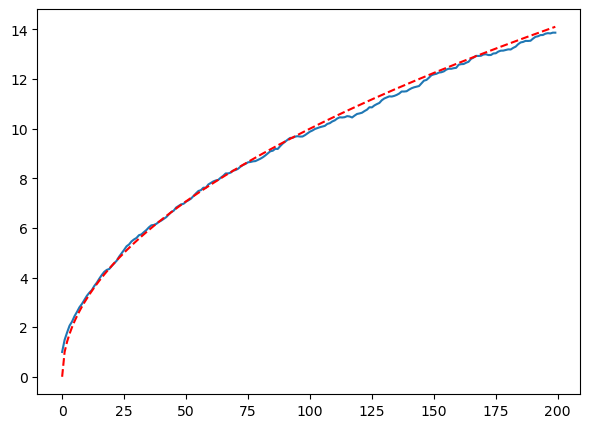

In [73]:
#quinto esercizio
walkers=1000
steps=np.arange(0,200,1)

walks=np.random.randint(2,size=(walkers,steps.size))
walks[walks==0]=-1
                        
walking=np.cumsum(walks,axis=1)
walking=np.sqrt(np.mean(np.array([t**2 for t in walking]),axis=0))
                        
fig,ax=plt.subplots(1,1,figsize=(7,5))

ax.plot(steps,walking)
ax.plot(steps,np.sqrt(steps),linestyle="dashed",c="r")

plt.show()

    # year     hare     lynx  carrot
0     1900  30000.0   4000.0   48300
1     1901  47200.0   6100.0   48200
2     1902  70200.0   9800.0   41500
3     1903  77400.0  35200.0   38200
4     1904  36300.0  59400.0   40600
5     1905  20600.0  41700.0   39800
6     1906  18100.0  19000.0   38600
7     1907  21400.0  13000.0   42300
8     1908  22000.0   8300.0   44500
9     1909  25400.0   9100.0   42100
10    1910  27100.0   7400.0   46000
11    1911  40300.0   8000.0   46800
12    1912  57000.0  12300.0   43800
13    1913  76600.0  19500.0   40900
14    1914  52300.0  45700.0   39400
15    1915  19500.0  51100.0   39000
16    1916  11200.0  29700.0   36700
17    1917   7600.0  15800.0   41800
18    1918  14600.0   9700.0   43300
19    1919  16200.0  10100.0   41300
20    1920  24700.0   8600.0   47300


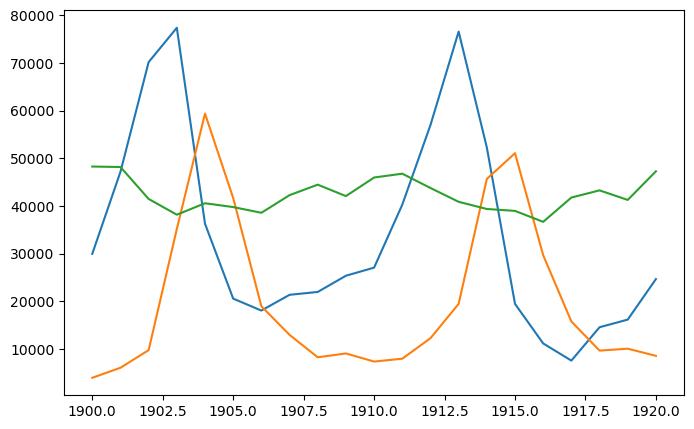

[34080.95238095 20166.66666667 42400.        ] 
 [20897.90645809 16254.59153691  3322.50622558] 

 [[ 4.58558619e+08  2.56418333e+07 -1.21050000e+06]
 [ 2.56418333e+07  2.77422333e+08 -3.85930000e+07]
 [-1.21050000e+06 -3.85930000e+07  1.15910000e+07]] 

 [[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]


 Which is the highest population for each year?
carrots
carrots
hares
hares
lynxes
lynxes
carrots
carrots
carrots
carrots
carrots
carrots
hares
hares
hares
lynxes
carrots
carrots
carrots
carrots
carrots


In [74]:
#sesto esercizio
#! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

data = np.loadtxt('populations.txt')
years   = data[:,0]
hares   = data[:,1]
lynxes   = data[:,2]
carrots = data[:,3]

fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(years,hares)
ax.plot(years,lynxes)
ax.plot(years,carrots)

plt.show()

#statistica
means=np.mean(data[:,1:],axis=0)
stds=np.std(data[:,1:],axis=0)
cov=np.cov(data[:,1:].T)
corr=np.corrcoef(data[:,1:].T)

print(means,"\n",stds,"\n\n",cov,"\n\n",corr)

#maggiore di ogni anno
print("\n\n Which is the highest population for each year?")
for t in range(data.shape[0]):
    find_max=np.max([hares[t],lynxes[t],carrots[t]])
    if find_max==hares[t]:
        print("hares")
    if find_max==lynxes[t]:
        print("lynxes")
    if find_max==carrots[t]:
        print("carrots")

# OSMEN

In [8]:
np.array([range(0,19,6)])

array([[ 0,  6, 12, 18]])

In [26]:
#Settimo esercizio

with open("credit_card.dat", mode='r') as f:
    for line in f:
        if len(line) < 6:
            print("\ndone")
        else:
            num=[]
            for i in range(19):
                num.append(chr(int(line[i*6:(i+1)*6],2)))
            
            card="".join(num)
            print(card)       

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0026
3026 7380 1241 1084


# Pandas

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
#ottavo esercizio
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P data/
import pandas as pd

N=50000
df=pd.read_csv("data/data_000637.txt")#,nrows=N)
df

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]

In [2]:
#nono esercizio
x= df["BX_COUNTER"].max()+1
x

3564

In [3]:
#decimo esercizio
time=((df["ORBIT_CNT"].max()-df["ORBIT_CNT"].min())*x*25)/10**9
time

0.9804564

In [4]:
#undicesimo esercizio
df["time (s)"]=(df["ORBIT_CNT"]*x*25+df["BX_COUNTER"]*25+25/30*df["TDC_MEAS"])/10**9
df

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

              time (s)  
0        344745.734939  
1        344745.734939  
2        344745.734944  
3        344745.734944  
4        344745.734949  
...                ...  
1310715  344746.715355  
1310716  344746.715355  
1310717  344746.715355  
1310718  344746.715355  
1310719  344746.715355  

[1310720 rows x 7 columns]

In [6]:
#dodicesimo esercizio
import numpy as np
mask=np.random.randint(0,2,df.shape[0])
df2=df.copy()
df2["HEAD"]=mask

df2

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           0     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           0     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           0     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     0     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

              time (s)  
0        344745.734939  
1        344745.734939  
2        344745.734944  
3        344745.734944  
4        344745.734949  
...                ...  
1310715  344746.715355  
1310716  344746.715355  
1310717  344746.715355  
1310718  344746.715355  
1310719  344746.715355  

[1310720 rows x 7 columns]

In [7]:
#tredicesimo esercizio
df3=df2.loc[df2["HEAD"]==1]
df3

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
1           1     0          124  3869200167        2374        27   
3           1     0           64  3869200167        2558        19   
6           1     0           61  3869200167        2772        14   
9           1     0           60  3869200167        2788         7   
11          1     0           64  3869200167        2786        19   
...       ...   ...          ...         ...         ...       ...   
1310714     1     0           60  3869211171         762         2   
1310715     1     0           62  3869211171         762        14   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

              time (s)  
1        344745.734939  
3        344745.734944  
6        344745.734949  
9        344745.734949  
11       344745.734949  
...                ...  
1310714  344746.715355  
1310715  344746.715355  
1310717  344746.715355  
1310718  344746.715355  
1310719  344746.715355  

[658010 rows x 7 columns]

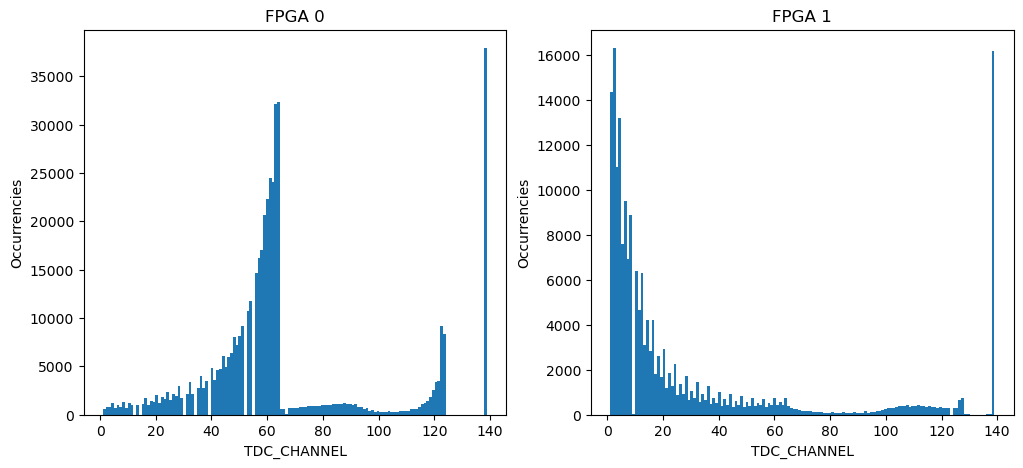

In [8]:
#quattordicesimo esercizio
import matplotlib.pyplot as plt

fpga0=df3.loc[df3["FPGA"]==0]
fpga1=df3.loc[df3["FPGA"]==1]

fig,ax=plt.subplots(1,2,figsize=(12,5))

ax[0].hist(fpga0["TDC_CHANNEL"],bins=139)
ax[1].hist(fpga1["TDC_CHANNEL"],bins=139)

ax[0].set_title("FPGA 0")
ax[1].set_title("FPGA 1")

ax[0].set_xlabel('TDC_CHANNEL')
ax[0].set_ylabel('Occurrencies')
ax[1].set_xlabel('TDC_CHANNEL')
ax[1].set_ylabel('Occurrencies')

plt.show()

In [21]:
#quindicesimo esercizio
df3.groupby("TDC_CHANNEL").size().sort_values(ascending=False).head(3)

TDC_CHANNEL
139    54119
64     33103
63     32550
dtype: int64

In [22]:
#sedicesimo esercizio
print(len(df3.groupby("ORBIT_CNT")))
print(len(df3.loc[df["TDC_CHANNEL"]==139].groupby("ORBIT_CNT")))

11000
10826


# Monte Carlo method

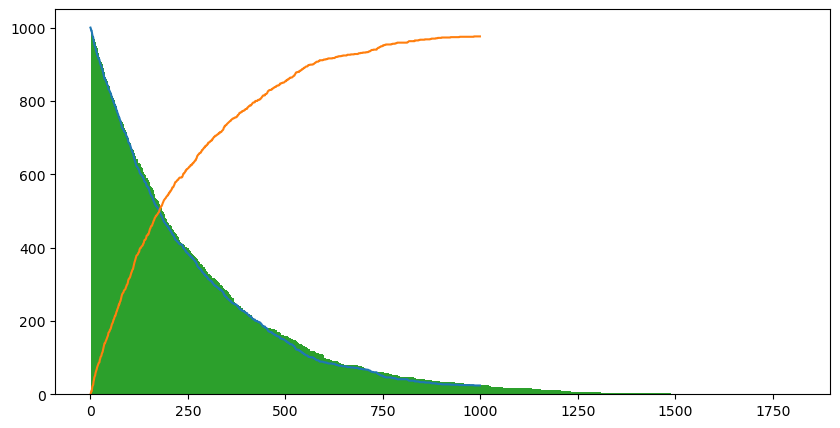

In [1]:
#diciassettesimo esercizio
import numpy as np
import matplotlib.pyplot as plt

tau=3.052*60
ini_Ti=1000
ini_Pb=0
p=1-2**(-1/tau)

num_Ti=np.array([ini_Ti])
num_Pb=np.array([ini_Pb])

tot_time=1000
time_list = np.arange(0, tot_time)

for t in time_list[1:]:
    for x in range(ini_Ti):
        if_var=np.random.rand()
        if if_var < p:
            ini_Ti=ini_Ti-1
            ini_Pb=ini_Pb+1
        
    num_Ti=np.append(num_Ti,ini_Ti)
    num_Pb=np.append(num_Pb,ini_Pb)
        

def expon_icdf(z, mu=np.log(2)/tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-z)/mu

rand=np.random.rand(1000)
u=expon_icdf(rand)        
        
fig,ax=plt.subplots(1,1, figsize=(10,5))
ax.plot(time_list,num_Ti)
ax.plot(time_list,num_Pb)
ax.hist(u,cumulative = -1,bins=1000)

plt.show()

In [4]:
#diciottesimo esercizio
import numpy as np

E         = 7.7e6#eV
a0        = 5.2917777210922e-11
sigma     = a0/100
N_alpha   = 10**6 #Number of alpha particles shot
Z         = 79 #gold atomic number
e         = 1.602e-19 #C
epsilon_0 = 8.85e-12 #F/m

mean      = [0,0]
cov       = [[sigma**2, 0],
             [0, sigma**2]]
X1         = np.random.uniform(0,1,N_alpha) #beam 2d gaussian
X2         = np.random.uniform(0,1,N_alpha) #beam 2d gaussian
gaus_x1 = np.sqrt(-2*sigma**2*np.log(1-X1))   
gaus_x2 = np.sqrt(-2*sigma**2*np.log(1-X2))   

b=np.array([np.sqrt(gaus_x1**2+gaus_x2**2)])

theta=np.abs(np.array([2*np.arctan(Z*e/(2*np.pi*epsilon_0*E*b))]))

theta = np.abs(2*np.arctan(Z*e/(2*np.pi*epsilon_0*E*b)))
frac = theta[theta > np.pi/2].shape[0]/theta.shape[0]
print('Fraction of particle "bounced back" = ', frac*100,"%")

Fraction of particle "bounced back" =  0.0 %


In [7]:
#diciannovesimo esercizio
import scipy as sp
def f(x):
    return np.sin(1/(x*(2-x)))**2

N=100000
#optimal integration
x=np.linspace(0.001,1.999,N)
I_real=sp.integrate.trapz(f(x),x)
print(I_real)

# Monte Carlo integration
N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print(I)

#mean value integration
X=2*np.random.rand(N)
I2=2/N*np.sum(f(X))
sigma=2*np.sqrt(np.std(f(X))/N)
print(I2,sigma)

1.4505331367878012
1.45074
1.4488356670587554 0.0032492232351078254


In [79]:
#ventesimo esercizio
def NdimSphereArea(dim,radius):
    count=0
    N=10**6
    V=(2*radius)**dim
    X = np.random.uniform(-radius, radius, (N,dim))
    for x in X:
        if np.linalg.norm(x)**2 <= radius**2:
            count+=1
    print((count/N)*V)

NdimSphereArea(2,1)
NdimSphereArea(10,1)

3.14332
2.54464


In [89]:
#ventunesimo esercizio
def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return x**(-0.5)

N=10**4
x=np.random.rand(N)
int_w=1*np.sum(w(x))/N

x=np.random.rand(N)**2
int_f=1*int_w/N*np.sum(f(x)/w(x))
print(int_f)

0.8311752562622274


# Visualization

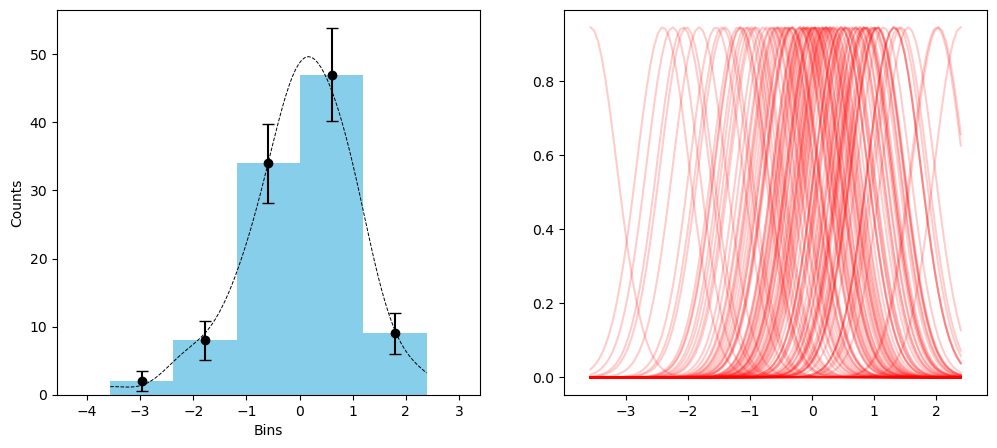

In [3]:
#ventiduesimo esercizio
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
N=100
mu=0
std=1

x=np.random.normal(mu,std,N)

sigma = 1.06 * std * N**(-1/5.)
xx = np.linspace(x.min(), x.max(), num = N)
f_x = np.zeros((N,N))

fig,ax=plt.subplots(1,2,figsize=(12,5))
n,bins,_=ax[0].hist(x,bins=N//20,color="skyblue")

centers=0.5*(bins[1:]+bins[:-1])
ax[0].errorbar(centers,n,n**(0.5),color="black",capsize=4,fmt="o")

for i in range(N):
    f_x[i] = sp.stats.norm.pdf(xx, loc = x[i], scale = sigma)
    ax[1].plot(xx, f_x[i], 'red', alpha = 0.2)

ax[0].set_xlabel("Bins")
ax[0].set_ylabel("Counts")
ax[0].set_yticks([i*10 for i in range(7)])

ax[0].set_xlim(-std+x.min(),std+x.max())
ax[1].set_xlim(x.min() - sigma, x.max()+sigma) 

binstep = bins[1] - bins[0]
gauss_sum = np.sum(f_x, axis = 0)
gauss_sum =  ( gauss_sum ) * N * binstep / sp.integrate.trapz(gauss_sum, xx)

ax[0].plot(xx, gauss_sum, color = 'black',linestyle = 'dashed',lw = 0.7)

plt.show()

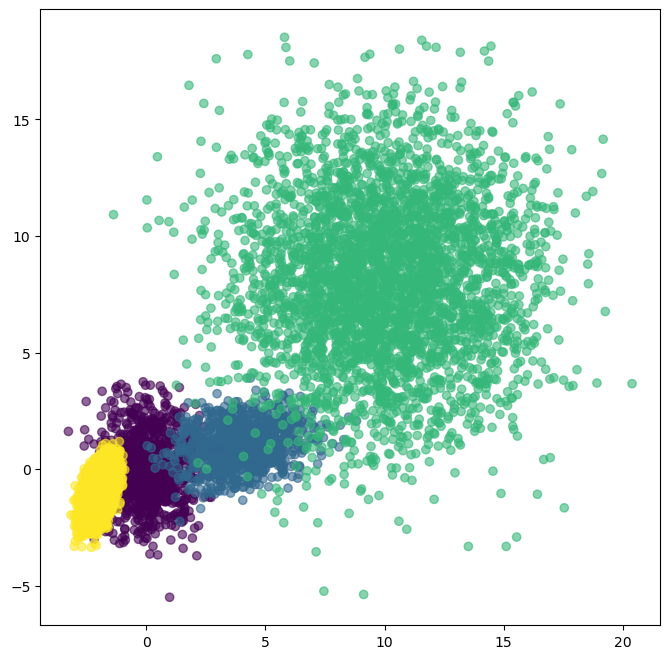

In [184]:
#ventitreesimo esercizio
def ndata_generator(array_data):
    i=0
    data = np.array([]).reshape(0,3)
    for x in array_data:
        norm=np.hstack((np.random.multivariate_normal(x[0], x[1], x[2]),np.full((x[2],1),i)))
        data=np.concatenate((data,norm),axis=0)
        i+=1
    return data

mean1 = np.array( [0., 0.])
mean2 = np.array( [4., 1.])
mean3 = np.array( [10, 8.])
mean4 = np.array( [-2, -1])

cov1 = np.array([[1., 0.],[0., 2.]])
cov2 = np.array([[2., .3],[.3, .8]])
cov3 = np.array([[10, 0.],[0., 12]])
cov4 = np.array([[.1, .1],[.1, .4]])

N1   = 1000
N2   = 1000
N3   = 3500
N4   = 9000

df = ndata_generator( [[mean1, cov1, N1],
                         [mean2, cov2, N2],
                         [mean3, cov3, N3],
                         [mean4, cov4, N4]] )

fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.scatter(df[:,0],df[:,1],c=df[:,2],alpha=0.6)
plt.show()

<ErrorbarContainer object of 3 artists>

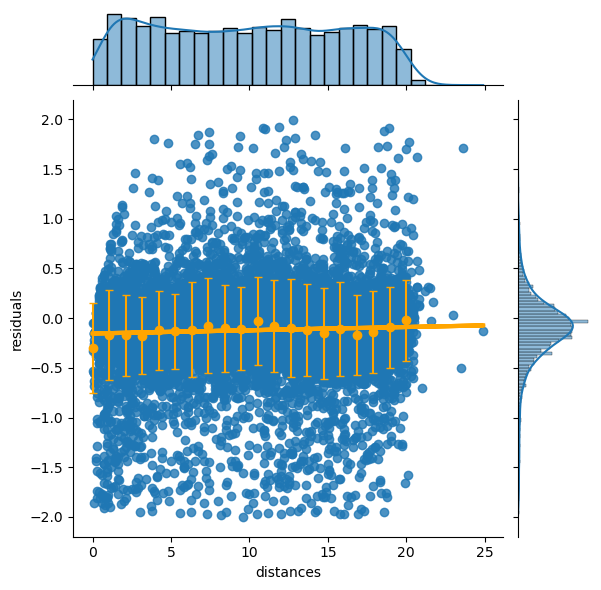

In [224]:
#ventiquattresimo esercizio
#! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns


df=pd.DataFrame(np.load("residuals_261.npy",allow_pickle=True).item())
df=df.loc[np.abs(df["residuals"])<2]

slope, intercept, r, p, se =sp.stats.linregress(df["distances"],df["residuals"])

ax=sns.jointplot(x="distances", y="residuals", data=df,kind="reg",line_kws  = {'color':'orange', "lw" : 3})

x=np.linspace(0,20,20)
y=np.array([])
err_y=np.array([])

for i in x:
    res_x = df[(df["distances"] <  (i+0.4)) & (df["distances"] >= (i-0.4))].residuals
    y=np.append(y,res_x.mean())
    err_y=np.append(err_y,res_x.std())
    
ax.ax_joint.plot(df.distances, intercept + slope*df.distances, linewidth = 3, color = 'orange')

ax.ax_joint.errorbar(x, y, yerr = err_y, color="orange",fmt="o",capsize=3)   

# Algorithms

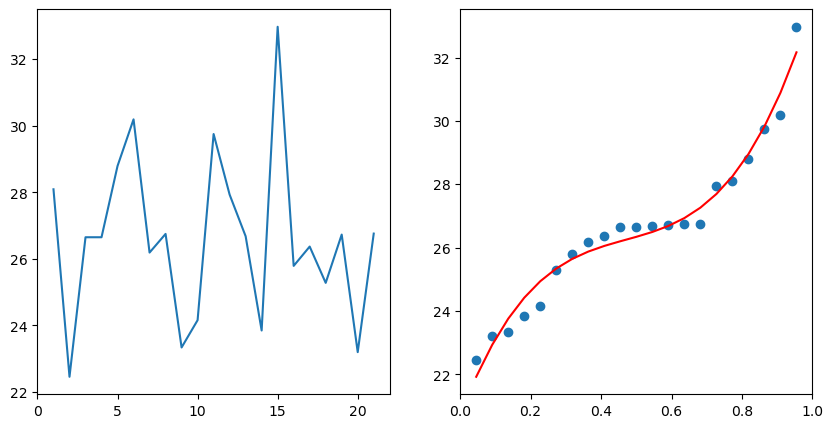

The 50 years maxima is estimated to be: 32.97989844019469 m/s


In [70]:
#venticinquesimo esercizio
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

max_wind_sort=np.sort(max_speeds)
years=np.arange(1,years_nb+1,1)
cumulative=np.array([i/(years_nb+1) for i in range(1,22)])

quantile_func=UnivariateSpline(cumulative, max_wind_sort)

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(years,max_speeds)
ax[1].scatter(cumulative,max_wind_sort)
ax[1].plot(cumulative,quantile_func(cumulative),c="red")
plt.show()

fifty_years_max = quantile_func(1-0.02)

print("The 50 years maxima is estimated to be:", fifty_years_max, "m/s")

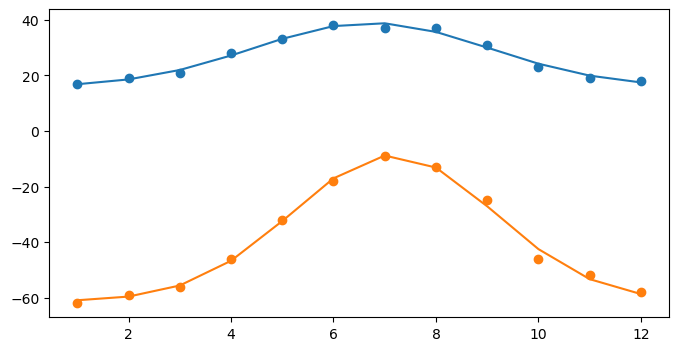

Are they incompatible? True


In [82]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

maxs=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
mins=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months=np.arange(1,13,1)

def gauss(x,N,offset,mu,sigma):
    return offset+N*np.exp(-(x-mu)**2/(2*sigma**2))

#we can give hints with po=[]
params_max,cov_max=sp.optimize.curve_fit(gauss,months,maxs)
params_min,cov_min=sp.optimize.curve_fit(gauss,months,mins)

fig,ax=plt.subplots(1,1,figsize=(8,4))
ax.scatter(months,maxs)
ax.scatter(months,mins)
ax.plot(months,gauss(months,params_max[0],params_max[1],params_max[2],params_max[3]))
ax.plot(months,gauss(months,params_min[0],params_min[1],params_min[2],params_min[3]))

plt.show()
print("Are they incompatible?",np.abs((params_max[2]-params_min[2]))/(np.max([np.sqrt(cov_max[2,2]),np.sqrt(cov_min[2,2])]))>3)

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
Powell result:
    direc: array([[ 0.00000000e+00,  1.00000000e+00],
       [-6.21111406e-04,  4.70877838e-05]])
     fun: -1.0316284534898421
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 3
  status: 0
 success: True
       x: array([-0.08984201,  0.71265634]) 


Results with [0,1] as initial guess:
       fun: -1.031628453489791
 hess_inv: array([[ 0.12834732, -0.00788045],
       [-0.00788045,  0.06138297]])
      jac: array([-2.08616257e-07, -1.53481960e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-0.08984203,  0.7126563 ]) 


Results with [0,-1] as initial guess:
       fun: -1.0316284534898152
 hess_inv: 

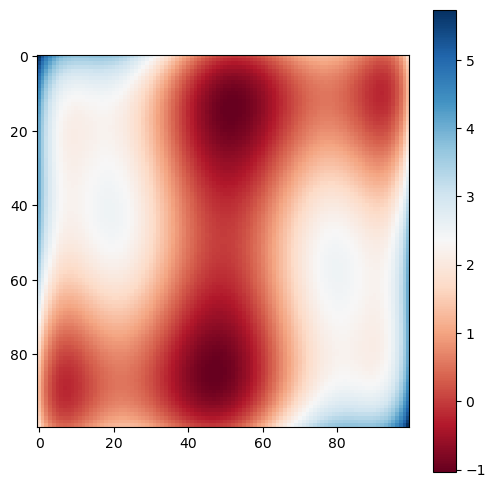

In [112]:
#ventisettesimo esercizio
import numpy as np
import scipy as sp

def funz(x):
    return x[0]**2*(4-2.1*x[0]**2+x[0]**4/3)+x[0]*x[1]+x[1]**2*(4*x[1]**2-4)

x=np.array([np.linspace(-2,2,100),np.linspace(-1,1,100)])

#first try
initial_guess = np.array([0,0])
result = sp.optimize.minimize(funz, initial_guess)
print(result)

#second try
initial_guess = np.array([0,0])
result = sp.optimize.minimize(funz, initial_guess,method="Powell")

initial_guess1 = np.array([0,1])
initial_guess2 = np.array([0,-1])
result1 = sp.optimize.minimize(funz, initial_guess1)
result2 = sp.optimize.minimize(funz, initial_guess2)

print("Powell result:\n",result,"\n\n")
print("Results with [0,1] as initial guess:\n",result1,"\n\n")
print("Results with [0,-1] as initial guess:\n",result2,"\n\n")

#plots
X,Y=np.meshgrid(x[0],x[1])
zs=np.array([funz(z) for z in zip(np.ravel(X),np.ravel(Y))])
Z=zs.reshape(X.shape)

fig,ax=plt.subplots(1,1,figsize=(6,6))
pos=ax.imshow(Z,cmap="RdBu")
fig.colorbar(pos)
plt.show()

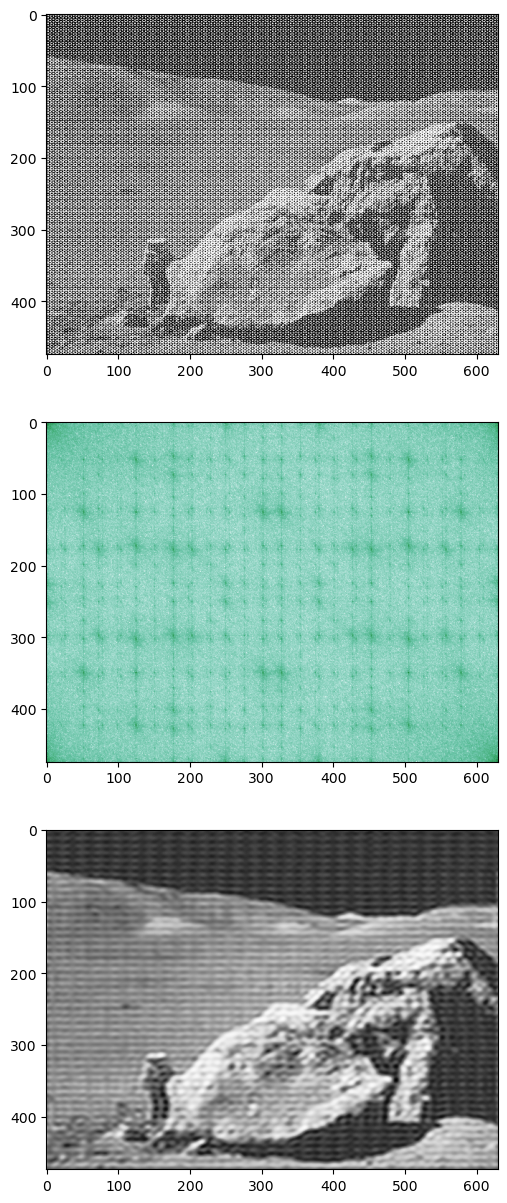

In [186]:
#ventottesimo esercizio
import matplotlib.pyplot as plt
import scipy as sp

moon=plt.imread("moonlanding.png")

moon_fft=sp.fftpack.fft2(moon)

fig,ax=plt.subplots(3,1,figsize=(6,15))
ax[0].imshow(moon,cmap="Greys_r")
ax[1].imshow(np.log(np.abs(moon_fft)),cmap="BuGn")

moon_fft2=np.copy(moon_fft)
#peak=4000
#moon_fft2[np.abs(moon_fft2) > peak] = 0
moon_fft2[50:-50,] = 0
moon_fft2[:,50:-50] = 0

moon_denoised=sp.fftpack.ifft2(moon_fft2).real
ax[2].imshow(moon_denoised,cmap="Greys_r")

plt.show()